In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from tensorflow.keras import models
from keras.models import Sequential
from tensorflow.keras import layers

In [2]:
dataset_train = pd.read_csv('trainset.csv')

In [3]:
dataset_train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [5]:
train_set = dataset_train.iloc[:,1:2].values

In [6]:
type(train_set)

numpy.ndarray

In [7]:
train_set.shape

(1259, 1)

In [8]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)
training_set_scaled.shape

(1259, 1)

In [9]:
X_train_array = []
y_train_array = []
for i in range(60, 1259):
    X_train_array.append(training_set_scaled[i-60:i,0])
    y_train_array.append(training_set_scaled[i,0])

X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))

In [10]:
X_train.shape

(1199, 60)

In [11]:
length = 60
n_features = 1

In [12]:
model = models.Sequential()
model.add(layers.SimpleRNN(10,input_shape=(length,n_features)))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse',metrics ='accuracy')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train1,y_train,epochs=100, batch_size=64)

Epoch 1/100
19/19 [==============================] - 1s 11ms/step - loss: 0.1904 - accuracy: 0.0000e+00
Epoch 2/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0333 - accuracy: 8.3403e-04
Epoch 3/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0073 - accuracy: 8.3403e-04
Epoch 4/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0026 - accuracy: 8.3403e-04
Epoch 5/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 8.3403e-04
Epoch 6/100
19/19 [==============================] - 0s 10ms/step - loss: 7.2659e-04 - accuracy: 8.3403e-04
Epoch 7/100
19/19 [==============================] - 0s 11ms/step - loss: 6.0703e-04 - accuracy: 8.3403e-04
Epoch 8/100
19/19 [==============================] - 0s 11ms/step - loss: 5.0867e-04 - accuracy: 8.3403e-04
Epoch 9/100
19/19 [==============================] - 0s 10ms/step - loss: 4.7009e-04 - accuracy: 8.3403e-04
Epoch 10/100
19/19 [============================

In [15]:
dataset_test = pd.read_csv('testset.csv')
test_set = dataset_test.iloc[:,1:2].values
test_set.shape

(125, 1)

In [16]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [17]:
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)

In [19]:
X_test = []
for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [20]:
X_test.shape

(1324, 60, 1)

In [21]:
predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)

42/42 [==============================] - 1s 6ms/step


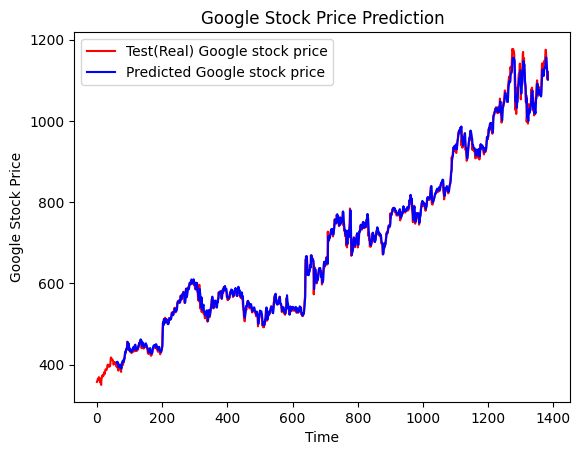

In [22]:
plt.plot(np.arange(0,1384),inputs, color='red', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue', label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()